In [1]:
import numpy as np
#import hmc_v2 as hmc
import hmc_v3 as hmc
import matplotlib.pyplot as plt
import corner

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-4,4),(-4,4),(-4,4)]
nparam = len(limits)

In [3]:
def mock_posterior_and_gradient(p):
    logP = -0.5 * np.sum(p**2)
    logP_jacobian = p * (-1)
    return logP, logP_jacobian

In [4]:
def run_hmc(n_it, filebase, epsilon, steps_per_iteration):
    #rank = 5
    rank = nparam
    filename = f'{filebase}.{rank}.txt'
    #np.random.seed(100 + rank)
    C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, C, epsilon, steps_per_iteration, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    # continue
    #for i in range(n_it):
        # Save chain
        #chain = np.array(sampler.trace)
        #np.savetxt(filename, chain)

        # next round of samples
        #sampler.sample(n_it)
    
    chain = np.array(sampler.paths)
    anti_chain = np.array(sampler.anti_paths)
    
    tr = np.array(sampler.trace)
    #np.savetxt(filename, chain)
    return chain, anti_chain, tr

In [10]:
nit = 10
spit = 150
chain, anti_chain, tr = run_hmc(nit, "hmc_002_500", 0.02, spit)
#chain = run_hmc(nit, "hmc_002_500", 0.02, spit)

Stopped after 80 steps
Accept 0 alpha=1.00  p=0.31  ΔH=0.000
Stopped after 80 steps
Accept 1 alpha=1.00  p=0.54  ΔH=-0.000
Stopped after 80 steps
Accept 2 alpha=1.00  p=0.15  ΔH=0.000
Stopped after 80 steps
Accept 3 alpha=1.00  p=0.09  ΔH=-0.000
Stopped after 80 steps
Accept 4 alpha=1.00  p=0.70  ΔH=0.000
Stopped after 80 steps
Accept 5 alpha=1.00  p=0.49  ΔH=-0.000
Stopped after 80 steps
Accept 6 alpha=1.00  p=0.24  ΔH=0.000
Stopped after 80 steps
Accept 7 alpha=1.00  p=0.90  ΔH=0.000
Stopped after 80 steps
Accept 8 alpha=1.00  p=0.41  ΔH=-0.000
Stopped after 80 steps
Accept 9 alpha=1.00  p=0.10  ΔH=0.000


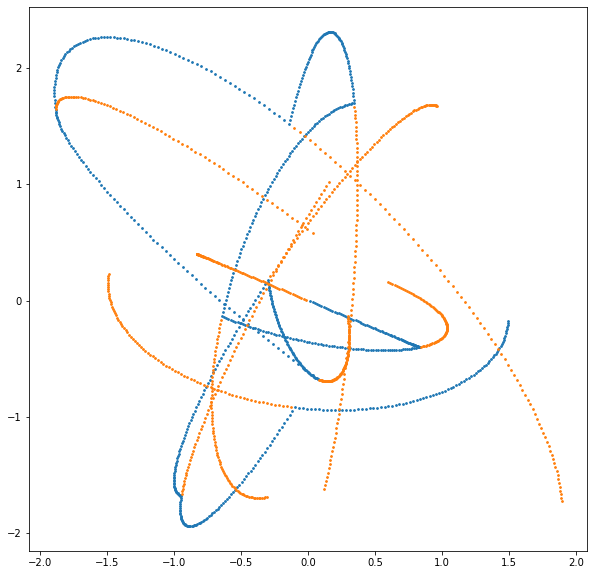

In [11]:
plt.scatter(chain[:,0],chain[:,1],s=3)
plt.scatter(anti_chain[:,0],anti_chain[:,1],s=3)
plt.show()

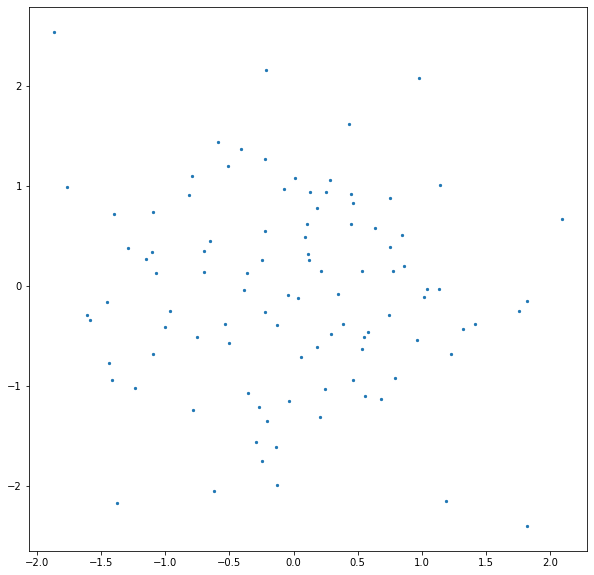

In [9]:
plt.scatter(tr[:,0],tr[:,1],s=5)
plt.show()